# Partial Derivatives - Introduction

## Multivariate Functions

Multivariate functions are functions with *multiple variables*: for instance, in the case of $y = mx + b$, we have the variables $m$ and $b$.

**Partial derivatives** enable the calculation of the derivatives of multivariate equations.

## Partial Derivatives with Python

Say we have the equation $z = x^2 - y^2$.

In [287]:
import numpy as np
import matplotlib.pyplot as plt

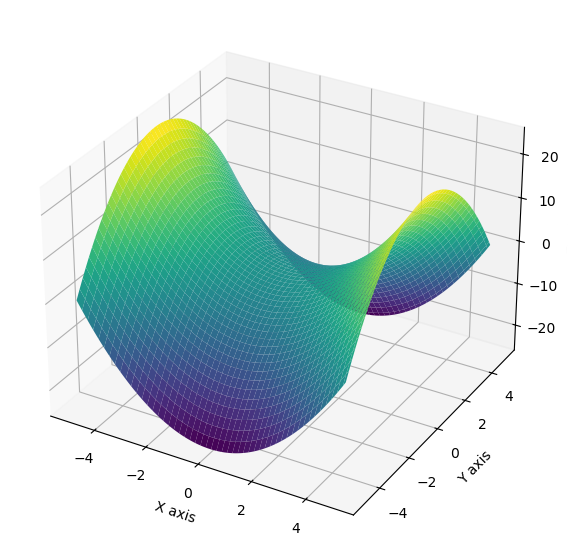

In [288]:
# plot z = x^2 - y^2
def plot_surface(X, Y, Z):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis')
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    plt.show()

X = np.linspace(-5, 5, 100)
Y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(X, Y)
Z = X**2 - Y**2

plot_surface(X, Y, Z)

The Z axis is the output of the function, $z$, so is the vertical location of any point on the curve.

If we want to observe how $z$ is a function of $x$, the partial derivative of $z$ with respect to $x$ is obtained by considering $y$ to be a constant.

As the derivative of a constant is $0$, the partial derivative is $\frac{\partial z}{\partial y} = 2x - 0 = 2x$.

What this means for this example, is that the slope of $z$ along the $x$ axis is twice the $x$ axis value.

Let's define $f(x, y) = x^2 - y^2$ and calculate the partial derivative of $f$ with respect to $x$ and $y$:

In [289]:
def f(my_x, my_y):
    return my_x**2 - my_y**2

Plotting $z$ w.r.t. $y$ by varying $x$:

In [290]:
xs = np.linspace(-3, 3, 100)

While holding $y$ constant:

In [291]:
zs_wrt_x = f(xs, 0)

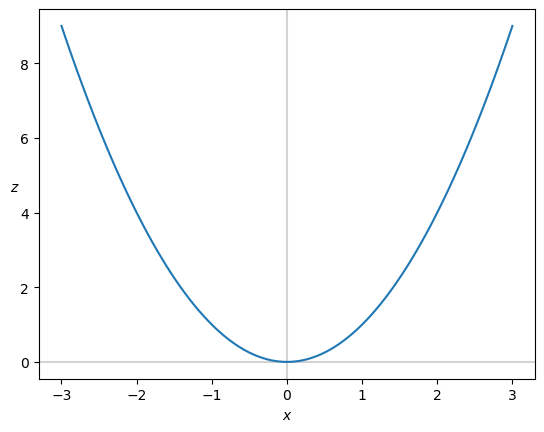

In [292]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')

plt.xlabel(r'$x$')
plt.ylabel(r'$z$', rotation=0)
_ = ax.plot(xs, zs_wrt_x)

To determine the slope of $z$ w.r.t. $x$, we can calculate the partial derivative:

In [293]:
def delz_delx(my_x, my_y):  # y isn't relevant for *this* partial derivative; it often would be
    return 2*my_x

In [294]:
x_samples = [-2, -1, 0, 1, 2]

In [295]:
colors = ['red', 'orange', 'green', 'blue', 'purple']

In [296]:
def point_and_tangent_wrt_x(my_xs, my_x, my_y, my_f, fprime, col):

    my_z = my_f(my_x, my_y) # z = f(x, y)
    plt.scatter(my_x, my_z, c=col, zorder=3)

    tangent_m = fprime(my_x, my_y) # Slope is partial derivative of f(x, y) w.r.t. x
    tangent_b = my_z - tangent_m*my_x # Line is z=mx+b, so b=z-mx
    tangent_line = tangent_m*my_xs + tangent_b

    plt.plot(my_xs, tangent_line, c=col,
             linestyle='dashed', linewidth=0.7, zorder=3)

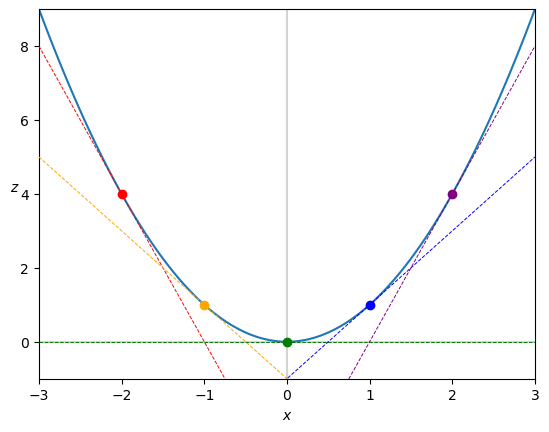

In [297]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')

for i, x in enumerate(x_samples):
    point_and_tangent_wrt_x(xs, x, 0, f, delz_delx, colors[i])

plt.ylim(-1, 9)
plt.xlim(-3, 3)
plt.xlabel(r'$x$')
plt.ylabel(r'$z$', rotation=0)
_ = ax.plot(xs, zs_wrt_x)

Now let's look at $z$ w.r.t. $y$ by varying $x$: the partial derivative of $z$ with respect to $y$ is obtained by considering $x$ to be a constant.

$\frac{\partial z}{\partial y} = 0 - 2y = -2y$

In [298]:
ys = np.linspace(-3, 3, 100)

In [299]:
zs_wrt_y = f(0, ys)

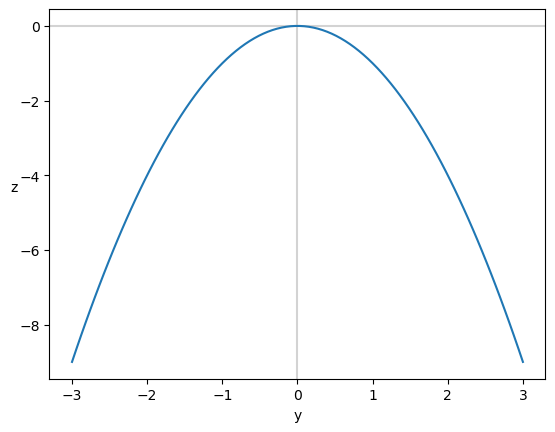

In [300]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')

plt.xlabel('y')
plt.ylabel('z', rotation=0)
_ = ax.plot(ys, zs_wrt_y)

The partial derivative of $z$ with respect to $y$ is independent of $x$, same as the partial derivative of $z$ with respect to $x$ is independent of $y$.

While $z$ varies as a function of both $x$ and $y$, the slope of $z$ w.r.t. $y$ is the same no matter what $x$ is.

So, for example, holding $x$ constant at $2$ increases $z$ by $-2y$ but has no impact on the slope of $z$ w.r.t. $y$:

In [301]:
zs_wrt_y = f(2, ys)

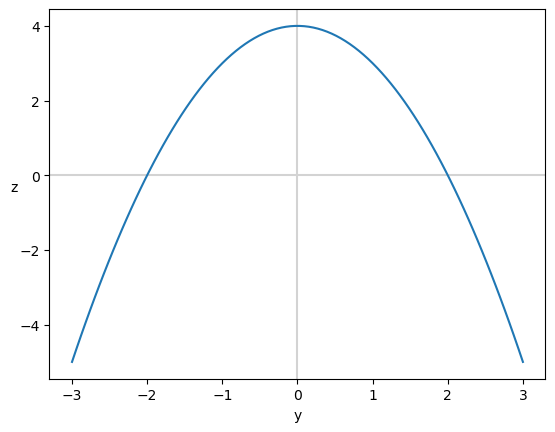

In [302]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')

plt.xlabel('y')
plt.ylabel('z', rotation=0)
_ = ax.plot(ys, zs_wrt_y)

In [303]:
def delz_dely(my_x, my_y):
    return -2*my_y

In [304]:
y_samples = [-2, -1, 0, 1, 2]

In [305]:
def point_and_tangent_wrt_y(my_ys, my_x, my_y, my_f, fprime, col): # changed my_xs to my_ys

    my_z = my_f(my_x, my_y)
    plt.scatter(my_y, my_z, c=col, zorder=3) # changed my_x to my_y

    tangent_m = fprime(my_x, my_y)
    tangent_b = my_z - tangent_m*my_y # changed my_x to my_y
    tangent_line = tangent_m*my_ys + tangent_b # changed my_xs to my_ys

    plt.plot(my_ys, tangent_line, c=col,
             linestyle='dashed', linewidth=0.7, zorder=3) # changed my_xs to my_ys

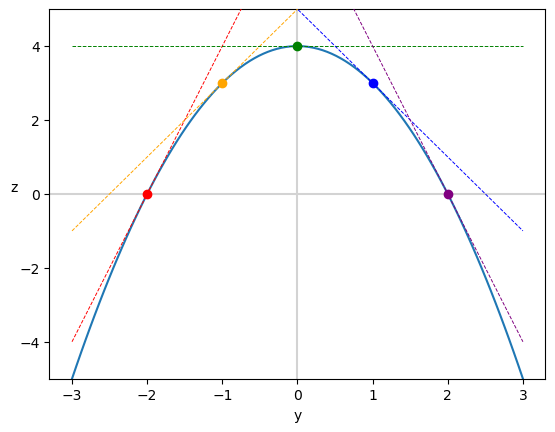

In [306]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')

for i, y in enumerate(y_samples):
    point_and_tangent_wrt_y(ys, 2, y, f, delz_dely, colors[i])

plt.ylim(-5, 5)
plt.xlabel('y')
plt.ylabel('z', rotation=0)
_ = ax.plot(xs, zs_wrt_y)

Calculate:

- the value of $z$
- the slope of $z$ w.r.t. $x$
- the slope of $z$ w.r.t. $y$

At the points where:

1. $x = 3$, $y = 0$
2. $x = 2$, $y = 3$
3. $x = -2$, $y = -3$

In [307]:
# value of z at x=3, y=0
z1 = f(3, 0)
# value of z at x=2, y=3
z2 = f(2, 3)
# value of z at x=-2, y=-3
z3 = f(-2, -3)

z1, z2, z3

(9, -5, -5)

In [308]:
#slope of z w.r.t. x at x=3, y=0
slope1_x = delz_delx(3, 0)
#slope of z w.r.t. x at x=2, y=3
slope2_x = delz_delx(2, 3)
#slope of z w.r.t. x at x=-2, y=-3
slope3_x = delz_delx(-2, -3)

slope1_x, slope2_x, slope3_x

(6, 4, -4)

In [309]:
#slope of z w.r.t. y at x=3, y=0
slope1_y = delz_dely(3, 0)
#slope of z w.r.t. y at x=2, y=3
slope2_y = delz_dely(2, 3)
#slope of z w.r.t. y at x=-2, y=-3
slope3_y = delz_dely(-2, -3)

slope1_y, slope2_y, slope3_y

(0, -6, 6)

## Partial Derivatives with Automatic Differentiation

Automatic differentiation enables to calculate partial derivatives easily.

For example, to calculate the slope of $z$ w.r.t. $x$ to both $z$ and $x$ at any given point $(x, y, z)$:

In [310]:
import torch

In [311]:
x = torch.tensor(0.).requires_grad_()
x

tensor(0., requires_grad=True)

In [312]:
y = torch.tensor(0.).requires_grad_()
y

tensor(0., requires_grad=True)

In [313]:
z = f(x, y) # Forward pass
z

tensor(0., grad_fn=<SubBackward0>)

In [314]:
z.backward() # Autodiff

The slope of the point $(0, 0, 0)$ w.r.t. to both the $x$ and $y$ axes is given by the gradients of $z$ w.r.t. $x$ and $y$:

In [315]:
x.grad, y.grad

(tensor(0.), tensor(-0.))

Let's repeat the previous examples using PyTorch's automatic differentiation.

Calculate:

- the value of $z$
- the slope of $z$ w.r.t. $x$
- the slope of $z$ w.r.t. $y$

At the points where:

1. $x = 3$, $y = 0$
2. $x = 2$, $y = 3$
3. $x = -2$, $y = -3$

In [330]:
# Define the function
def f(x, y):
    return x**2 - y**2

# Function to calculate value and gradients
def calculate_gradients(x_val, y_val):
    # Explicitly convert to float type to avoid integer tensor errors
    x = torch.tensor(float(x_val), requires_grad=True)
    y = torch.tensor(float(y_val), requires_grad=True)
    z = f(x, y)
    z.backward()
    return z.item(), x.grad.item(), y.grad.item()

# Function to display results
def display_results(x_val, y_val):
    z, slope_x, slope_y = calculate_gradients(x_val, y_val)
    print(f"At point (x={x_val}, y={y_val}):")
    print(f"  z = {z}")
    print(f"  ∂z/∂x = {slope_x}")
    print(f"  ∂z/∂y = {slope_y}")

# Calculate and display results for the specified points
display_results(3, 0)
display_results(2, 3)
display_results(-2, -3)

At point (x=3, y=0):
  z = 9.0
  ∂z/∂x = 6.0
  ∂z/∂y = -0.0
At point (x=2, y=3):
  z = -5.0
  ∂z/∂x = 4.0
  ∂z/∂y = -6.0
At point (x=-2, y=-3):
  z = -5.0
  ∂z/∂x = -4.0
  ∂z/∂y = 6.0
